In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
DATA_DIR = '/content/drive/My Drive/KDD_DataSet'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df = pd.read_csv(DATA_DIR + '/weekly_housing_market_data_most_recent.tsv', sep='\t')

In [ ]:
def type_converted(dt):
  y = pd.to_datetime(dt).date().year
  m = pd.to_datetime(dt).date().month
  d = pd.to_datetime(dt).date().day
  d1 = str(y) + str(m) + str(d)
  return int(d1)

def get_formatted_data(filtered_df):
  filtered_df.period_begin = pd.to_datetime(df.period_begin)
  filtered_df['period_begin'] = filtered_df['period_begin'].apply(lambda x: x.value)
  filtered_df.period_end = pd.to_datetime(df.period_end)
  filtered_df['period_end'] = filtered_df['period_end'].apply(lambda x: x.value)
  return filtered_df 
    

In [ ]:
cleaned_df = df[["period_begin","period_end","region_name","region_type","pending_sales", "total_new_listings", "total_homes_sold", "median_sale_price", "off_market_in_one_week", "inventory", "price_drops"]]
filtered_df = cleaned_df[(cleaned_df['region_name']=='Boston, MA metro area') & (cleaned_df['region_type'] == "metro")]
filtered_df.drop(columns=['region_name', 'region_type'])
data = get_formatted_data(filtered_df)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
data = data.drop(["region_name", "region_type"], axis=1)
data = data.dropna()
x = data.iloc[:,:2].values
y = data.iloc[:,2:].values
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)
y = sc.fit_transform(y)
x.shape, y.shape

((739, 2), (739, 7))

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20, shuffle=False)
 

In [ ]:

from tensorflow.keras.optimizers import Adam
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=6, activation='relu'))
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))
#output
nn.add(tf.keras.layers.Dense(units=7))
#compile 
nn.compile(optimizer =Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['accuracy','mse'])


In [ ]:
xtrain.shape, ytrain.shape
nn.fit(xtrain, ytrain, batch_size=32, epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 3ms/step - loss: 0.1612 - accuracy: 0.2030 - mse: 0.1612
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.0761 - mse: 0.1065
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.0812 - mse: 0.0837
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.1929 - mse: 0.0718
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.3012 - mse: 0.0629
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.2995 - mse: 0.0568
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.2758 - mse: 0.0520
Epoch 8/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.2860 - mse: 0.0490
Epoch 9/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.26

In [ ]:
ypred = nn.predict(xtest)
ypred = sc.inverse_transform(ypred)
ytest = sc.inverse_transform(ytest)

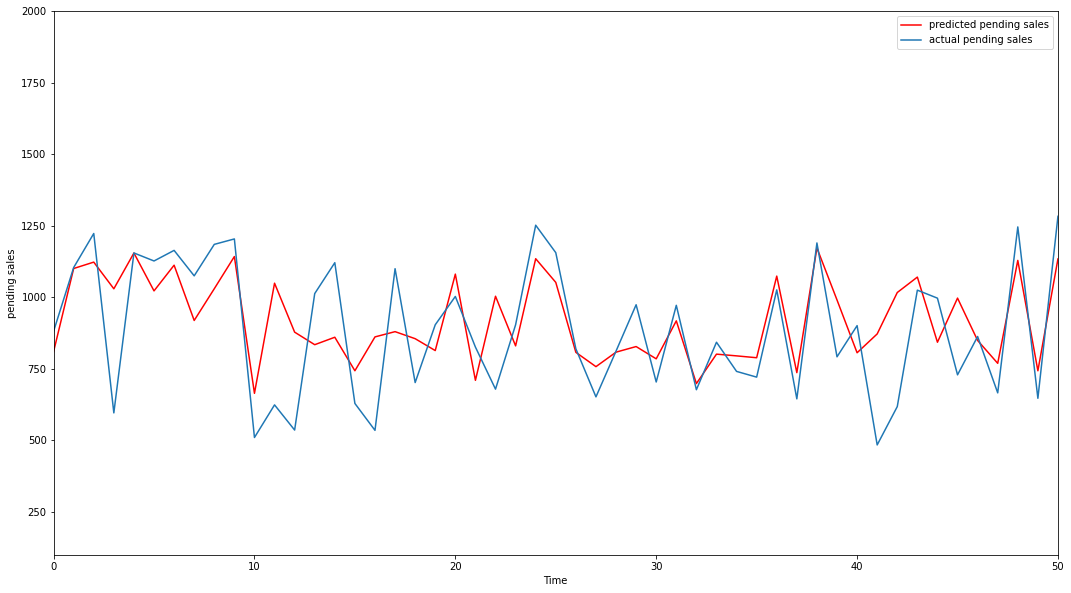

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][0])
  t_ps.append(ytest[i][0])
plt.plot(x_axis, p_ps, color = 'red', label='predicted pending sales')
plt.plot(x_axis, t_ps, label ='actual pending sales')
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.axis([0, 50, 100, 2000])
plt.legend()
plt.show()


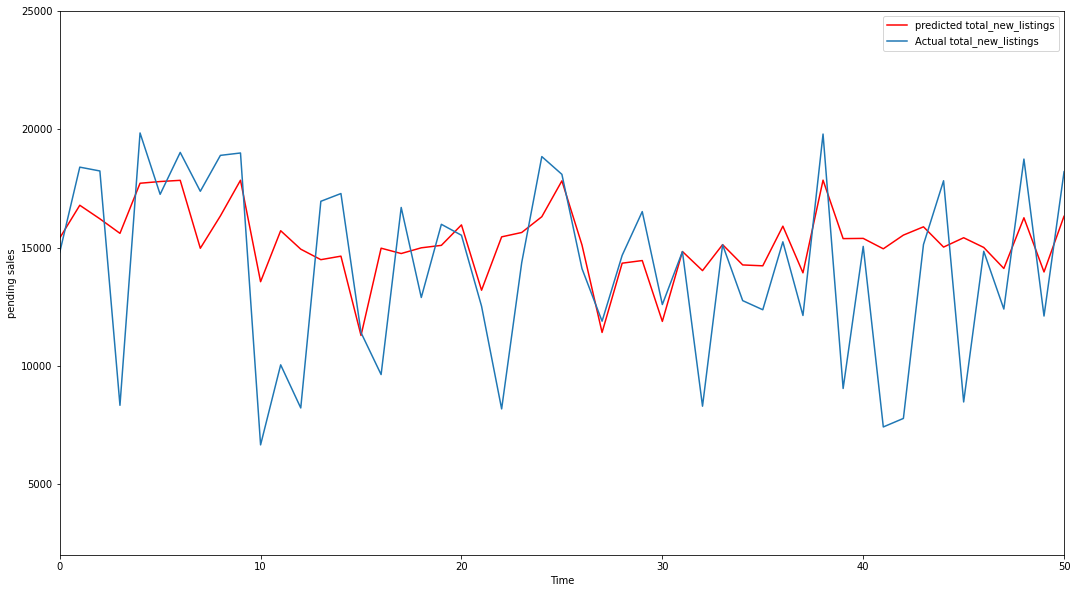

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][1])
  t_ps.append(ytest[i][1])
plt.plot(x_axis, p_ps, color = 'red', label='predicted total_new_listings')
plt.plot(x_axis, t_ps, label ='Actual total_new_listings')
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.legend()
plt.axis([0, 50, 2000, 25000])
plt.show()

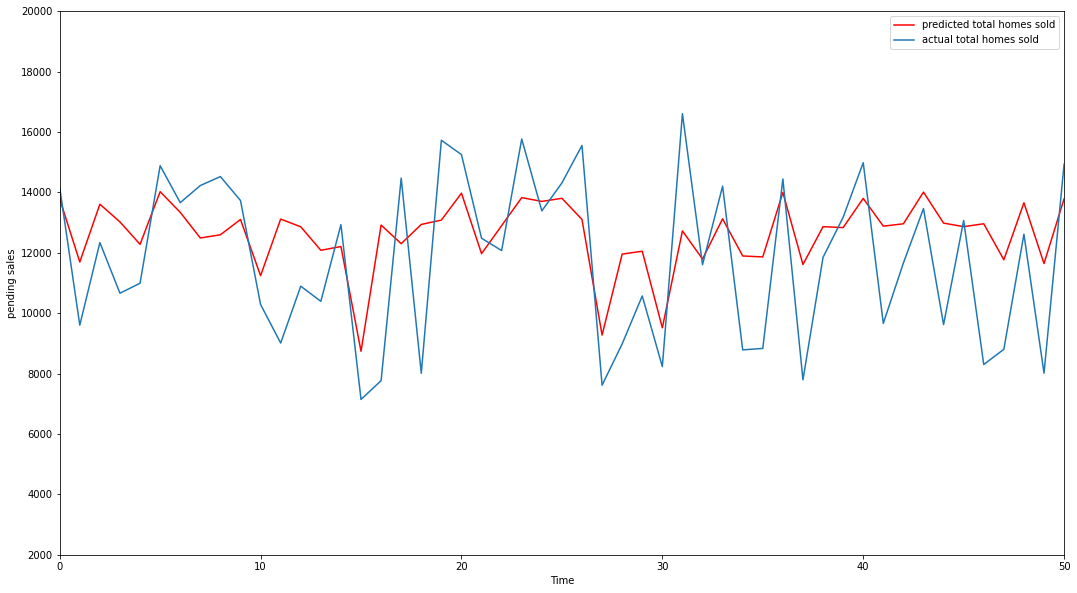

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][2])
  t_ps.append(ytest[i][2])
plt.plot(x_axis, p_ps, color = 'red', label='predicted total homes sold')
plt.plot(x_axis, t_ps, label ='actual total homes sold')
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.axis([0, 50, 2000, 20000])
plt.legend()
plt.show()

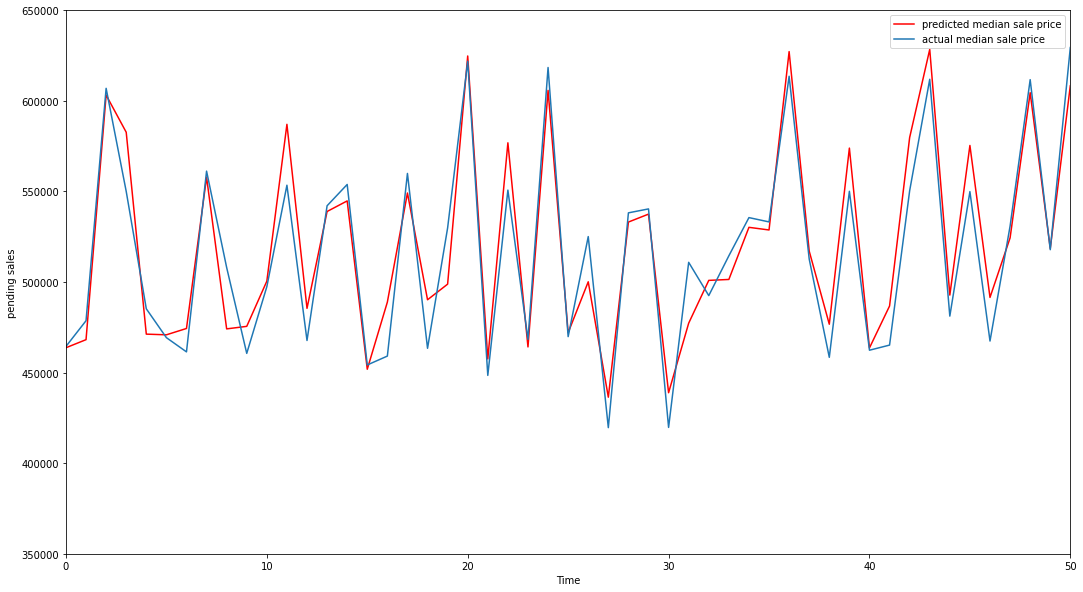

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][3])
  t_ps.append(ytest[i][3])
plt.plot(x_axis, p_ps, color = 'red', label='predicted median sale price')
plt.plot(x_axis, t_ps, label ='actual median sale price')
plt.axis([0, 50, 350000, 650000])
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.legend()
plt.show()

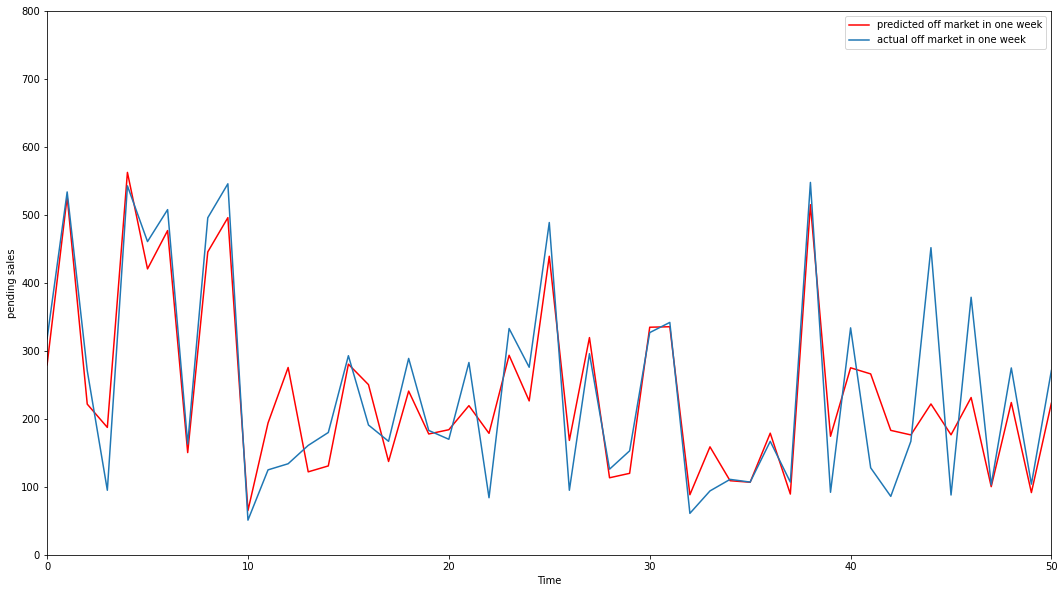

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][4])
  t_ps.append(ytest[i][4])
plt.plot(x_axis, p_ps, color = 'red', label='predicted off market in one week')
plt.plot(x_axis, t_ps, label ='actual off market in one week')
plt.axis([0, 50, 0, 800])
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.legend()
plt.show()

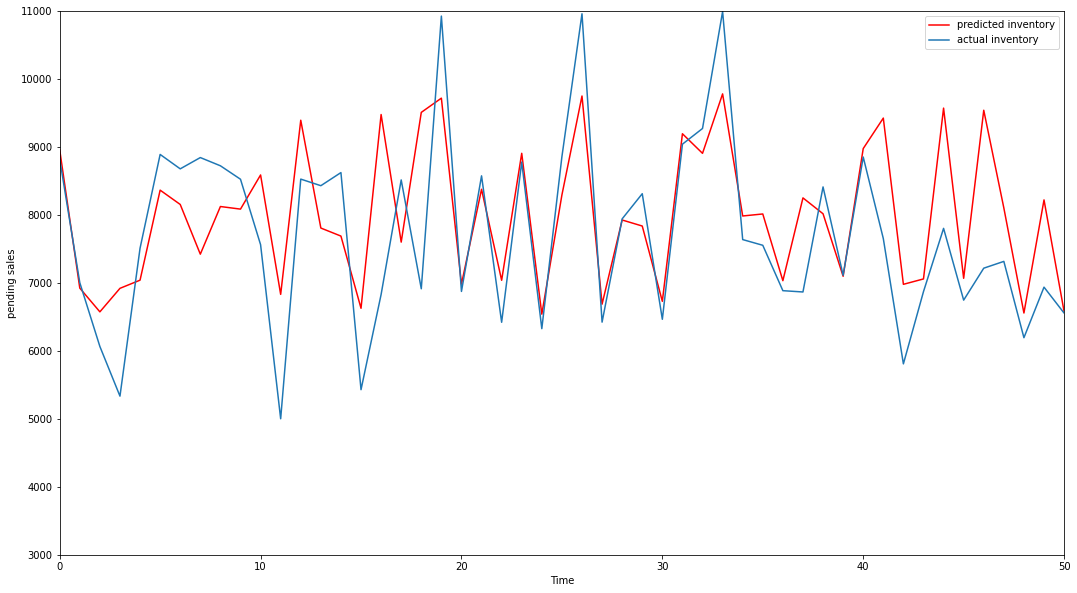

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][5])
  t_ps.append(ytest[i][5])
plt.plot(x_axis, p_ps, color = 'red', label='predicted inventory')
plt.plot(x_axis, t_ps, label ='actual inventory')
plt.axis([0, 50, 3000, 11000])
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.legend()
plt.show()

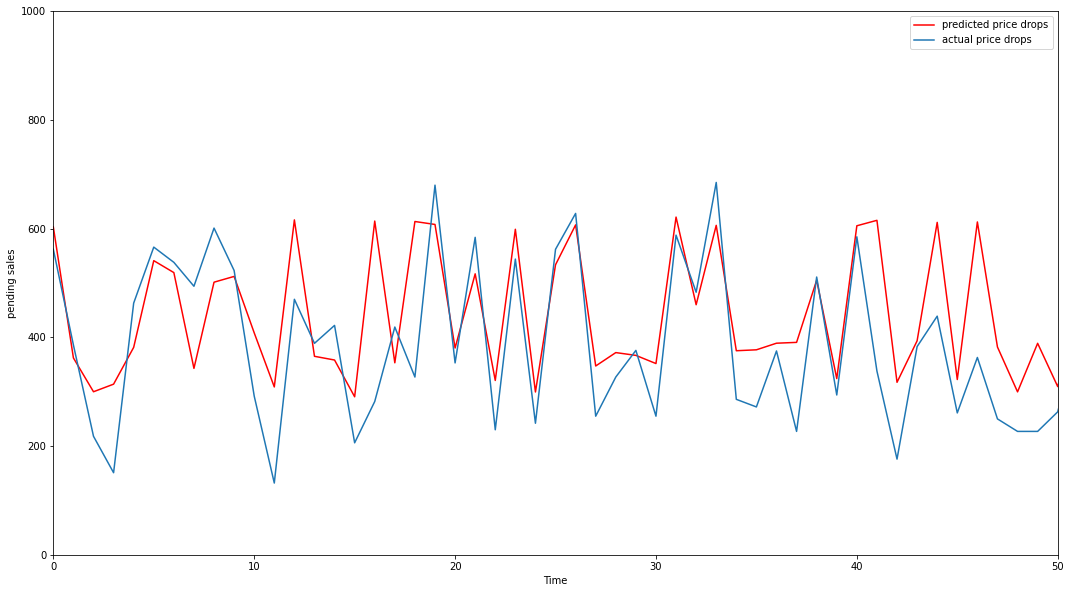

In [ ]:
x_axis = []
p_ps = []
t_ps = []
plt.figure(figsize=(18,10))

for i in range(len(ypred)):
  x_axis.append(i)
  p_ps.append(ypred[i][6])
  t_ps.append(ytest[i][6])
plt.plot(x_axis, p_ps, color = 'red', label='predicted price drops')
plt.plot(x_axis, t_ps, label ='actual price drops')
plt.axis([0, 50, 0, 1000])
plt.xlabel("Time")
plt.ylabel("pending sales")
plt.legend()
plt.show()